In [2]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def cumulative_average(numbers):
    numbers = np.array(numbers)
    cum_sum = np.cumsum(numbers)
    indices = np.arange(1, len(numbers) + 1)
    cum_avg = cum_sum / indices
    return cum_avg.tolist()

In [4]:
names_of_files = 'acdm_rpf2d_20240316-000844_metrics_sa.pkl,\
acdm_rpf2d_20240316-000739_metrics_sa.pkl,\
pde_refiner_rpf2d_20240215-203203_metrics_sa.pkl,\
pde_refiner_rpf2d_20240219-201931_metrics_sa.pkl'

name_of_files = names_of_files.split(',')

In [5]:
labels = ['ACDM_844', 'ACDM_739', 'PDE Refiner_203', 'PDE Refiner_931']

In [6]:
name_of_files[1]

'acdm_rpf2d_20240316-000739_metrics_sa.pkl'

In [7]:
metrics_list = []
for i in range(len(name_of_files)):
    metrics_list.append(pickle.load(open('./thesis_results/state_avg/'+name_of_files[i], 'rb')))

In [8]:
column_mean=[]
column_mean_target=[]
column_std=[]
column_std_target=[]
    
#metrics_list is a list containing all the rollouts of each model, Each entry of the list corresponds 
#to a different model. Each entry contains a dictionary of rollouts. Each rollout contains a dictionary of metrics.
    
for metrics in metrics_list: 
    cumulative_average_of_mse = []
    cumulative_average_of_mse_target = []
    
    cumulative_average_of_ekin = []
    cumulative_average_ekin_target = []
    
    cumulative_average_of_sinkhorn = []
    cumulative_average_of_sinkhorn_target = []
    
    #this loop is executed once per model
    for rollout in metrics.values(): #metrics.keys()=['rollout_0', 'rollout_1',...]; 
                                     #metrics.values()=[{rollout-0: ekin,mse,mse1,mse5,mse10,sinkhorn}, {rollout-1: ekin,mse,mse1,mse5,mse10,sinkhorn}, ...]
        for k, v in rollout.items(): #key 'k' contains mse1, mse5, mse10, mse20, e_kin, sinkhorn
            #determine the cumulative average of the metrics
            if k =='mse': #v has a shape of 20, cumulative average of mse also has a shape of 20
                cumulative_average_of_mse.append(cumulative_average(v))
                cumulative_average_of_mse_target.append(np.zeros(len(v)))
            if k =='e_kin':
                cumulative_average_of_ekin.append(cumulative_average(v['predicted']))
                cumulative_average_ekin_target.append(cumulative_average(v['target']))
                
            if k =='sinkhorn':
                cumulative_average_of_sinkhorn.append(cumulative_average(v))
                cumulative_average_of_sinkhorn_target.append(np.zeros(len(v)))

    cumulative_average_of_mse = np.array(cumulative_average_of_mse)  #shape (2,20). 2 is the number of rollouts and 20 is the number of time steps
    cumulative_average_of_ekin = np.array(cumulative_average_of_ekin)
    cumulative_average_ekin_target = np.array(cumulative_average_ekin_target)
    cumulative_average_of_sinkhorn = np.array(cumulative_average_of_sinkhorn)

    column_mean_position = np.mean(cumulative_average_of_mse, axis=0) #mean across rollouts, shaoe (20,)
    column_std_position = np.std(cumulative_average_of_mse, axis=0) #std across rollouts, shape (20,)
    column_mean_position_target = np.mean(cumulative_average_of_mse_target, axis=0)
    column_std_position_target = np.std(cumulative_average_of_mse_target, axis=0)

    column_mean_ekin = np.mean(cumulative_average_of_ekin, axis=0) #mean across rollouts, shaoe (19,)
    column_std_ekin = np.std(cumulative_average_of_ekin, axis=0) #std across rollouts, shape (19,)
    column_mean_ekin_target = np.mean(cumulative_average_ekin_target, axis=0)
    column_std_ekin_target = np.std(cumulative_average_ekin_target, axis=0)

    column_mean_sinkhorn = np.mean(cumulative_average_of_sinkhorn, axis=0) #mean across rollouts, shaoe (20,)
    column_std_sinkhorn = np.std(cumulative_average_of_sinkhorn, axis=0) #std across rollouts, shape (20,)
    column_mean_sinkhorn_target = np.mean(cumulative_average_of_sinkhorn_target, axis=0)
    column_std_sinkhorn_target = np.std(cumulative_average_of_sinkhorn_target, axis=0)

    #each entry of the lists below are for a particular model
    column_mean.append([column_mean_position,column_mean_ekin, column_mean_sinkhorn])  
    column_mean_target.append([column_mean_position_target, column_mean_ekin_target, column_mean_sinkhorn_target])
    
    column_std.append([column_std_position, column_std_ekin, column_std_sinkhorn])
    column_std_target.append([column_std_position_target, column_std_ekin_target, column_std_sinkhorn_target])

In [9]:
column_mean[0] #mse, ekin, sinkhorn for model 0

[array([0.0003962 , 0.00141967, 0.00364344, 0.00798881, 0.01555108,
        0.02658441, 0.04024001, 0.05511235, 0.06964925, 0.08266226,
        0.09373522, 0.10293429, 0.11065754, 0.11733973, 0.1231789 ,
        0.12827544, 0.1328162 , 0.13689038, 0.14042265, 0.1436403 ]),
 array([ 2.50921428,  3.33649957,  4.45046759,  5.94469452,  7.77387543,
         9.85035896, 12.16934368, 14.72371197, 17.47240618, 20.38843536,
        23.44874989, 26.60830816, 29.82190294, 33.06031145, 36.29059448,
        39.48518181, 42.61171588, 45.64659797, 48.57769454]),
 array([2.29555662e-05, 6.04913821e-05, 1.14006218e-04, 2.27009034e-04,
        3.97333037e-04, 5.22881572e-04, 5.32949077e-04, 4.92726074e-04,
        4.59269633e-04, 4.47621127e-04, 4.38540243e-04, 4.25974237e-04,
        4.10886875e-04, 3.90550587e-04, 3.79593003e-04, 3.73144227e-04,
        3.69044034e-04, 3.67627195e-04, 3.64449047e-04, 3.59393179e-04])]

In [11]:
column_std[0] #mse, ekin, sinkhorn for model 0

[array([1.55794842e-05, 2.10533035e-05, 2.70595774e-06, 5.12395054e-05,
        1.69968605e-04, 3.73290231e-04, 5.72945390e-04, 7.60089606e-04,
        8.73052412e-04, 8.51061940e-04, 8.91100277e-04, 9.35922066e-04,
        9.30685263e-04, 8.39454787e-04, 8.28178724e-04, 8.59946012e-04,
        7.87861207e-04, 6.02530109e-04, 4.78292766e-04, 4.00841236e-04]),
 array([0.0060128 , 0.02786696, 0.03671408, 0.05234814, 0.07178879,
        0.08432325, 0.09627696, 0.10596752, 0.11297692, 0.11553802,
        0.12154319, 0.12034225, 0.11101708, 0.10343061, 0.10023804,
        0.09884071, 0.08755314, 0.07240974, 0.05559018]),
 array([8.47659976e-06, 1.99440456e-05, 3.24808692e-05, 3.40318948e-05,
        1.06253661e-05, 2.63249385e-05, 3.49437552e-05, 2.94830243e-05,
        3.54793932e-05, 4.79445094e-05, 5.85693527e-05, 6.47826237e-05,
        6.59046480e-05, 6.22407533e-05, 5.79033513e-05, 5.68739779e-05,
        5.34640653e-05, 5.06370432e-05, 5.12164429e-05, 4.67524980e-05])]

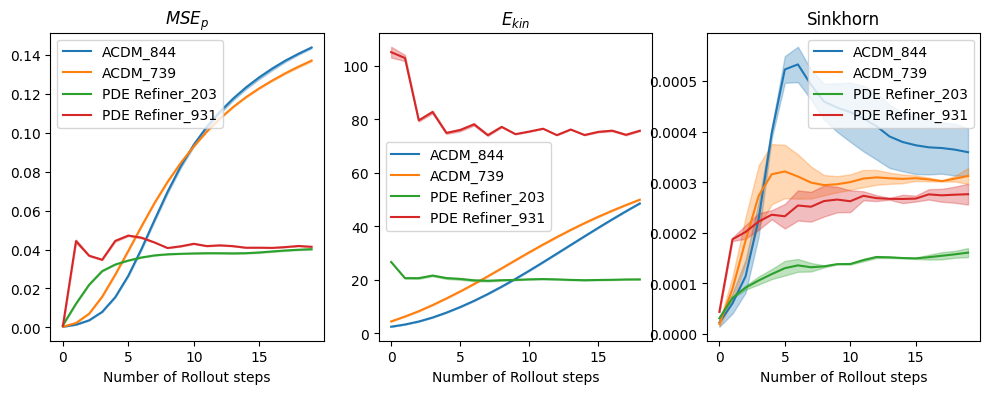

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for j in range(len(metrics_list)):# runs as many times as the number of files /models
    for i,m in enumerate(['$MSE_p$', '$E_{kin}$', 'Sinkhorn']): 
        ax[i].plot(np.arange(len(column_mean[j][i])),column_mean[j][i], label=labels[j], color=plt.cm.tab10.colors[j])        
        ax[i].fill_between(np.arange(len(column_mean[j][i])),y1=column_mean[j][i] - column_std[j][i], 
                        y2=column_mean[j][i] + column_std[j][i], 
                        alpha=0.3,label="", color=plt.cm.tab10.colors[j])
        
        #ax[i].plot(np.arange(len(column_mean_target[j][i])),column_mean_target[j][i], label=labels[j], linestyle='dashed')

        # ax[i].fill_between(x=np.arange(len(column_mean_target[j][i])),y1=column_mean_target[j][i] - column_std_target[j][i], 
        #                 y2=column_mean_target[j][i] + column_std_target[j][i], 
        #                 alpha=0.3)
        ax[i].set_title(m)
        ax[i].set_xlabel('Number of Rollout steps')
        #Legend 
        ax[i].legend()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def random_color(value):
    colormap = cm.get_cmap('jet')  # Choose a colormap, such as 'viridis'
    color = colormap(value)
    return color

# Example usage:
num_values = 5
random_values = np.random.rand(num_values)  # Generate random values
for value in random_values:
    color = random_color(value)
    print("Random value:", value, "Mapped color:", color)

# Plot example
plt.figure()
for value in random_values:
    color = random_color(value)
    plt.scatter(value, value, color=color)
plt.xlabel('Random Value')
plt.ylabel('Random Value')
plt.title('Random Colors')
plt.show()
